In [22]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# Import State-Level Fiscal Data, Organize by Year, and Drop Missing Values

In [23]:
#Read states.csv and convert to dataframe
states_df = pd.read_csv("Resources/states.csv")

#Delete unnecessary columns, reorder columns, and clean column names
states_df = states_df[["STATE", "YEAR", "TOTAL_REVENUE", "TOTAL_EXPENDITURE", "ENROLL"]]
states_df.rename(columns = {"STATE": "State", 
                            "YEAR": "Year", 
                            "TOTAL_REVENUE": "Total Revenues", 
                            "TOTAL_EXPENDITURE": "Total Expenditures", 
                            "ENROLL": "Enrollment"}, inplace = True) 

#Delete rows with missing values and reset index
states_df = states_df.dropna().reset_index()
del states_df["index"]

#Display dataframe
states_df


,State,Year,Total Revenues,Total Expenditures,Enrollment
0,Alabama,1993,2827391,2833433,727716.0
1,Alaska,1993,1191398,1126398,121156.0
2,Arizona,1993,3427976,3623946,676297.0
3,Arkansas,1993,1346909,1376067,311432.0
4,California,1993,28043338,28110986,5129788.0
...,...,...,...,...,...
1219,Virginia,2016,16259274,16497520,1283493.0
1220,Washington,2016,14964364,15253296,1083973.0
1221,West Virginia,2016,3391579,3366566,276764.0
1222,Wisconsin,2016,11697466,11787535,857736.0


# Merge Above with Test Score Data and Drop Non-Null, Non-Numeric Values

In [24]:
#Read naep.csv and convert to dataframe
tests_df = pd.read_csv("Resources/naep.csv")

#Delete unnecessary columns, reorder columns, and clean column names
tests_df = tests_df[["STATE", "YEAR", "TEST_YEAR", "TEST_SUBJECT", "AVG_SCORE"]]
tests_df.rename(columns = {"STATE": "State", 
                           "YEAR": "Year",
                           "TEST_YEAR": "Grade Level",
                           "TEST_SUBJECT": "Test Subject", 
                           "AVG_SCORE": "Average Test Score"}, inplace = True)

#Remove rows that have non-null, non-numeric objects and convert remainder to numeric
tests_df = tests_df[pd.to_numeric(tests_df["Average Test Score"], errors="coerce").notnull()]
tests_df[["Average Test Score"]] = tests_df[["Average Test Score"]].apply(pd.to_numeric)

#Split into dataframes based on test subject and then grade level
math_tests_df = tests_df.loc[tests_df["Test Subject"] == "Mathematics", :]
math_tests_fourth_df = math_tests_df.loc[math_tests_df["Grade Level"] == 4,:]
math_tests_eighth_df = math_tests_df.loc[math_tests_df["Grade Level"] == 8,:]
reading_tests_df = tests_df.loc[tests_df["Test Subject"] == "Reading", :]
reading_tests_fourth_df = reading_tests_df.loc[reading_tests_df["Grade Level"] == 4,:]
reading_tests_eighth_df = reading_tests_df.loc[reading_tests_df["Grade Level"] == 8,:]

#Delete unnecessary columns and rename columns
math_tests_fourth_df = math_tests_fourth_df[["State", "Year", "Average Test Score"]].rename(columns = {"Average Test Score": "Average Math Score (4th Grade)"})
math_tests_eighth_df = math_tests_eighth_df[["State", "Year", "Average Test Score"]].rename(columns = {"Average Test Score": "Average Math Score (8th Grade)"})
reading_tests_fourth_df = reading_tests_fourth_df[["State", "Year", "Average Test Score"]].rename(columns = {"Average Test Score": "Average Reading Score (4th Grade)"})
reading_tests_eighth_df = reading_tests_eighth_df[["State", "Year", "Average Test Score"]].rename(columns = {"Average Test Score": "Average Reading Score (8th Grade)"})

#Merge into single dataframe using state-by-state financial data
merged_math_df = pd.merge(math_tests_fourth_df, math_tests_eighth_df, on = ["State", "Year"], how = "outer")
merged_reading_df = pd.merge(reading_tests_fourth_df, reading_tests_eighth_df, on = ["State", "Year"], how = "outer")
merged_tests_df = pd.merge(merged_math_df, merged_reading_df, on = ["State", "Year"], how = "outer")
merged_state_data = pd.merge(states_df, merged_tests_df, on = ["State", "Year"], how = "outer")
merged_state_data = merged_state_data.sort_values(["State", "Year"]).set_index(["State", "Year"])

#Display dataframe
merged_state_data


Total Revenues  Total Expenditures  Enrollment  \
State   Year                                                   
Alabama 1990             NaN                 NaN         NaN   
        1992             NaN                 NaN         NaN   
        1993       2827391.0           2833433.0    727716.0   
        1994       2970223.0           3103266.0    730004.0   
        1995       3367437.0           3353363.0    727480.0   
...                      ...                 ...         ...   
Wyoming 2013       1695967.0           1675477.0     91533.0   
        2014       1772633.0           1775999.0     92732.0   
        2015       1962874.0           1942406.0     93867.0   
        2016       2044669.0           2034229.0     94511.0   
        2017             NaN                 NaN         NaN   

              Average Math Score (4th Grade)  Average Math Score (8th Grade)  \
State   Year                                                                   
Alabama 1990                             NaN                      252.863660   
        1992                      208.327876                      252.187522   
        1993                             NaN                             NaN   
        1994                             NaN                             NaN   
        1995                             NaN                             NaN   
...                                      ...                             ...   
Wyoming 2013                      246.522401                      288.119137   
        2014                             NaN                             NaN   
        2015                      246.759764                      286.666547   
        2016                             NaN                             NaN   
        2017                      247.820619                      288.761812   

              Average Reading Score (4th Grade)  \
State   Year                                      
Alabama 1990                                NaN   
        1992                         207.358492   
        1993                                NaN   
        1994                         207.963517   
        1995                                NaN   
...                                         ...   
Wyoming 2013                         225.848975   
        2014                                NaN   
        2015                         228.160803   
        2016                                NaN   
        2017                         226.831211   

              Average Reading Score (8th Grade)  
State   Year                                     
Alabama 1990                                NaN  
        1992                                NaN  
        1993                                NaN  
        1994                                NaN  
        1995                                NaN  
...                                         ...  
Wyoming 2013                         270.966172  
        2014                                NaN  
        2015                         268.803363  
        2016                                NaN  
        2017                         269.020028  

[1365 rows x 7 columns]

# Clean Graduation Data Using Excel, Import, and Merge with Fiscal Data

In [25]:
#Read Grad_Rate_2015_2016.csv and convert to dataframe
grad_data = pd.read_csv("Resources/acgr-lea-sy2015-16.CLEANED2.csv")

#Delete unnecessary columns, reorder columns, clean column names, convert value types, and drop rows with missing data
grad_data = grad_data[["LEAID", "ALL_RATE_1516"]].rename(columns = {"ALL_RATE_1516": "Graduation Rate"})
grad_data["LEAID"] = grad_data["LEAID"].astype(str)
grad_data = grad_data.dropna()

#Read districts.csv and convert to dataframe
fin_data = pd.read_csv("Resources/Sdf16_1a.csv")

#Delete unnecessary columns, clean column names, and convert value types
fin_data = fin_data[["STNAME", "NAME", "LEAID", "YEAR", "TOTALEXP"]].rename(columns = {"STNAME": "State", "NAME": "School District", "YEAR": "Year", "TOTALEXP": "Total Expenditures"})
fin_data["LEAID"] = fin_data["LEAID"].astype(str)

#Convert year format
fin_data["Year"] = 2016

#Drop rows with zero or negative expenditures
fin_data = fin_data[fin_data["Total Expenditures"] > 0]

#Merge graduation data and financial data
fin_grad = pd.merge(fin_data, grad_data, on = "LEAID", how = "outer")

#Drop rows with missing data
fin_grad = fin_grad.dropna()

#Fix dataframe formatting
fin_grad["Year"] = fin_grad["Year"].astype(int)
fin_grad["School District"] = fin_grad["School District"].str.title()
fin_grad["State"] = fin_grad["State"].str.title()
fin_grad = fin_grad.reset_index()
fin_grad = fin_grad[["State", "School District", "LEAID", "Year", "Total Expenditures", "Graduation Rate"]]

#Read districts.csv and convert to dataframe
dist_enroll = pd.read_csv("Resources/districts.csv")

#Delete unnecessary columns and clean column names
dist_enroll = dist_enroll[["NAME", "ENROLL", "YRDATA"]].rename(columns = {"NAME": "School District", "ENROLL": "Enrollment", "YRDATA": "Year"})
dist_enroll["School District"] = dist_enroll["School District"].str.title()

#Filter dataframe by year
dist_enroll = dist_enroll[dist_enroll["Year"] == 2016]

#Merge enrollment data
fin_grad_enroll = pd.merge(fin_grad, dist_enroll, on = ["School District", "Year"], how = "left")

#Display dataframe
fin_grad_enroll


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,State,School District,LEAID,Year,Total Expenditures,Graduation Rate,Enrollment
0,Alabama,Albertville City,100005,2016,46778000.0,92.0,NaN
1,Alabama,Marshall County,100006,2016,64739000.0,88.0,NaN
2,Alabama,Hoover City,100007,2016,165436000.0,93.0,NaN
3,Alabama,Madison City,100008,2016,101154000.0,97.0,NaN
4,Alabama,Leeds City,100011,2016,32285000.0,92.0,NaN
...,...,...,...,...,...,...,...
11812,Wyoming,Sweetwater County School District #2,5605762,2016,49501000.0,87.0,NaN
11813,Wyoming,Washakie County School District #2,5605820,2016,3557000.0,75.0,NaN
11814,Wyoming,Teton County School District #1,5605830,2016,56248000.0,97.5,NaN
11815,Wyoming,Weston County School District #7,5606090,2016,6670000.0,90.0,NaN


# Import District-Level Enrollment Data and Compute Expenditures per Pupil

In [26]:
#Read districts.csv and convert to dataframe
districts = pd.read_csv("Resources/districts.csv")

#Delete unnecessary columns, reorder columns, clean column names, convert value types, and drop rows with missing data
districts = districts[["STATE", "NAME", "YRDATA", "TOTALREV", "TOTALEXP", "ENROLL"]].rename(columns = {"STATE": "State", "NAME": "School District", "YRDATA": "Year", "TOTALREV": "Total Revenues", "TOTALEXP": "Total Expenditures", "ENROLL": "Enrollment"})
districts["School District"] = districts["School District"].str.title()
districts = districts.dropna()
districts["Enrollment"] = districts["Enrollment"].astype(int)

#Multiply fiscal data by 1,000 to match resource documentation
districts["Total Revenues"] = districts["Total Revenues"] * 1000
districts["Total Expenditures"] = districts["Total Expenditures"] * 1000

#Create expenditures-per-pupil column and reorder columns
districts["Expenditures per Pupil"] = districts["Total Expenditures"] / districts["Enrollment"]
districts = districts[["State", "School District", "Year", "Enrollment", "Total Revenues", "Total Expenditures", "Expenditures per Pupil"]]
districts = districts.round({"Expenditures per Pupil":2})

#Filter dataframe by year
districts = districts.loc[districts["Year"] == 2016]

#Display dataframe
districts

,State,School District,Year,Enrollment,Total Revenues,Total Expenditures,Expenditures per Pupil
0,Alabama,Autauga County School District,2016,9609,80867000,76672000,7979.19
1,Alabama,Baldwin County School District,2016,30931,338236000,299880000,9695.13
2,Alabama,Barbour County School District,2016,912,10116000,10070000,11041.67
3,Alabama,Eufaula City School District,2016,2842,26182000,29843000,10500.70
4,Alabama,Bibb County School District,2016,3322,32486000,31662000,9531.01
...,...,...,...,...,...,...,...
14320,Wyoming,Uinta Co Sch Dist 6,2016,697,13832000,13441000,19284.07
14321,Wyoming,Washakie Sch Dist 2,2016,106,3726000,3557000,33556.60
14322,Wyoming,Washakie Co Sch Dist 1,2016,1358,25693000,25240000,18586.16
14323,Wyoming,Weston Co Sch Dist 1,2016,799,15935000,16276000,20370.46


# Group District Expenditures and Graduation Rates by State, Then Merge

In [27]:
#Remove rows from preceding dataframe where enrollment is zero
state_dist = districts.loc[districts["Enrollment"] > 0]

#Group by state
state_dist = state_dist.groupby("State").mean().reset_index()

#Delete unnecessary columns, change value types, and round figures
state_dist = state_dist[["State", "Year", "Expenditures per Pupil"]]
state_dist["Year"] = state_dist["Year"].astype(int)
state_dist = state_dist.round({"Expenditures per Pupil":2})

#Group graduation data by state and delete unnecessary columns
state_grad = fin_grad_enroll.groupby("State").mean().reset_index()
state_grad = state_grad[["State", "Year", "Graduation Rate"]]

#Merge expenditure and graduation averages
avg_grad_exp = pd.merge(state_dist, state_grad, on = ["State", "Year"], how = "left")
avg_grad_exp = avg_grad_exp.rename(columns = {"Expenditures per Pupil": "Average Expenditures per Pupil", "Graduation Rate": "Average Graduation Rate"})

#Display dataframe
avg_grad_exp

,State,Year,Average Expenditures per Pupil,Average Graduation Rate
0,Alabama,2016,10587.46,88.040441
1,Alaska,2016,28906.86,72.645833
2,Arizona,2016,22815.54,71.407591
3,Arkansas,2016,10995.46,88.547619
4,California,2016,22488.62,84.251064
5,Colorado,2016,15746.96,80.137931
6,Connecticut,2016,22836.90,88.669065
7,Delaware,2016,16740.25,83.620000
8,District of Columbia,2016,27361.86,NaN
9,Florida,2016,10604.66,80.194030


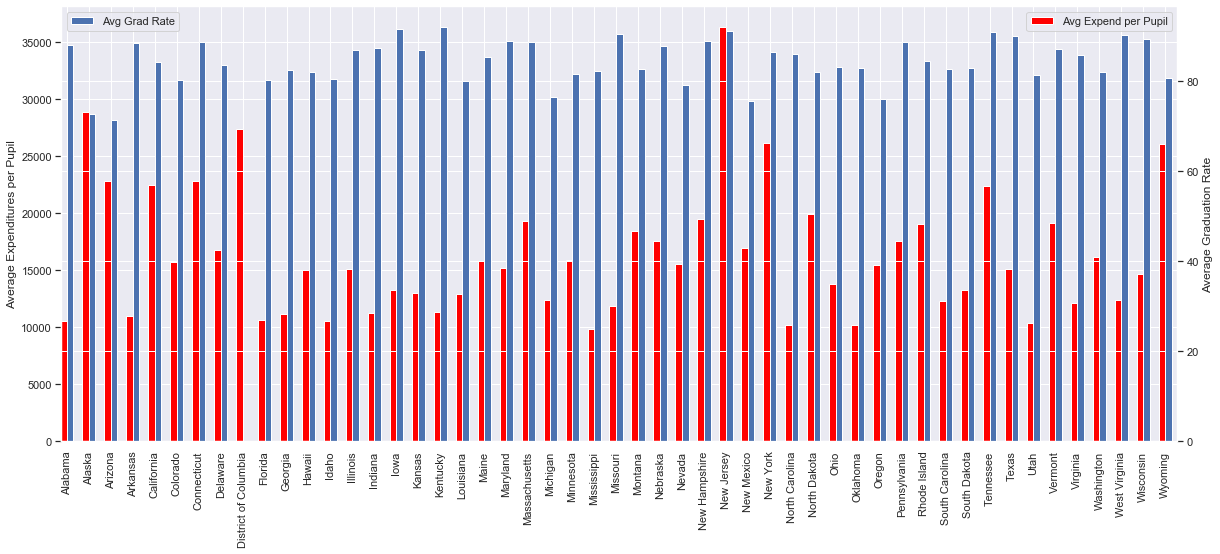

In [35]:

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = .3

avg_grad_exp["Average Expenditures per Pupil"].plot(kind='bar', color = "red", ax=ax, width=width, position=1)
avg_grad_exp["Average Graduation Rate"].plot(kind='bar', ax=ax2, width=width, position=0)

ax.set_ylabel("Average Expenditures per Pupil")
ax2.set_ylabel("Average Graduation Rate")

ax.xaxis.set_ticklabels(avg_grad_exp["State"])

ax.legend(["Avg Expend per Pupil"])
ax2.legend(["Avg Grad Rate"], loc = "upper left")

sns.set()

plt.savefig("avg_grad_exp")

plt.show()